# Reconocimiento de Dígitos Manuscritos
## Algoritmos de Clasificación
Aplicación de OCR (Optical Character Recognition)

Conjunto de Datos: incluido en scikit-learn
Fuente: UCI ML hand-written digits datasets

<img src="../images/digits_classification.png" align="middle" style="width:550px;height:360px;"/>

# Importar las librerías

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Importar los datos

In [2]:
digits = datasets.load_digits()

# Explorar y visualizar los datos

In [3]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [4]:
#digits.DESCR

## Imágenes

In [5]:
digits.images.shape

(1797, 8, 8)

In [6]:
type(digits.images)

numpy.ndarray

In [7]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
digits.images[0].reshape(1,64)[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## Datos Preparados

In [9]:
digits.data.shape

(1797, 64)

In [10]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## Valores Objetivo Etiquetados

In [11]:
digits.target.shape

(1797,)

In [12]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

## Nombres Valores Objetivo

In [13]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Dividir los datos para Entrenar y Evaluar el Modelo de Aprendizaje

In [14]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, 
                                                    random_state=2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1347, 64) (450, 64)
(1347,) (450,)


## Crear el Modelo de Clasificación

### Decision Tree

In [15]:
#number_clas = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

### Logistic Regression
A pesar del nombre es un modelo de clasificación

In [16]:
number_clas = LogisticRegression()

# Fase de Entrenamiento
El algoritmo de aprendizaje usa los datos de entrenamiento para ajustar los parámetros del modelo.

**model.fit(X_train, y_train)**


In [17]:
number_clas.fit(X_train, y_train)

C:\Users\pherm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pherm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
type(number_clas)

sklearn.linear_model.logistic.LogisticRegression

# Fase de Evaluación
El modelo se aplica sobre los datos de evaluación para validar su funcionamiento

**model.predict(X_test)**

In [19]:
y_pred = number_clas.predict(X_test)

In [20]:
y_pred.shape

(450,)

In [21]:
y_pred[:10]

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [22]:
y_test[:10]

array([4, 0, 9, 1, 4, 7, 1, 5, 1, 6])

# Evaluar el Modelo


## Calcular la precisión del modelo
Se comparan los valores de test con los valores de la predicción.

**accuracy_score(y_test, y_pred)**

In [23]:
metrics.accuracy_score(y_test, y_pred)

0.9466666666666667

In [24]:
correct_pred = np.sum(y_test == y_pred)
total_pred = len(y_test)
print("{0} / {1} predicciones correctas".format(correct_pred, total_pred))

426 / 450 predicciones correctas


## Utilizar la matriz de confusión

In [25]:
print(metrics.confusion_matrix(y_test, y_pred))

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  3  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  2  0  3  1  0]
 [ 0  2  0  0 36  0  0  0  1  1]
 [ 0  0  0  0  0 52  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  1  0]
 [ 0  0  0  0  0  0  0 48  1  0]
 [ 0  2  0  0  0  0  0  0 38  0]
 [ 0  0  0  1  0  1  0  1  2 34]]


Text(0.5, 0, 'y_predicted')

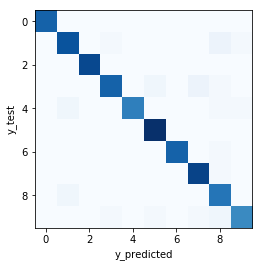

In [26]:
plt.imshow(metrics.confusion_matrix(y_test, y_pred),
          cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.ylabel('y_test')
plt.xlabel('y_predicted')

## Visualizar los datos y las predicciones

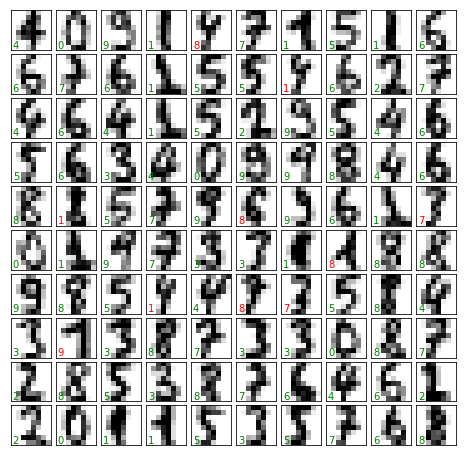

In [27]:
fig, axes = plt.subplots(10, 10, figsize=(8,8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
    ax.text(0.05, 0.05, str(y_pred[i]),
            transform=ax.transAxes,
            color='green' if (y_test[i] == y_pred[i]) else 'red')
    ax.set_xticks([])
    ax.set_yticks([])